<a href="https://colab.research.google.com/github/taha-naveed/BraTS2021_UNETR/blob/main/BraTS2021_UNETR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Segmentation Using UNETR on BraTS2021 Dataset

### Project Description:
This project focuses on implementing the UNETR (U-Net Transformer) model to perform brain tumor segmentation on the BraTS2021 dataset, a comprehensive collection of MRI scans from glioma patients. The project explores how advanced AI models can assist in segmenting tumor regions in 3D MRI data by leveraging both Transformer-based long-range dependency capture and U-Net's encoder-decoder architecture.

The primary objectives include:
1. **Dataset Analysis**: Understanding the BraTS2021 dataset through analyzing MRI modalities, voxel ranges, label values, and visualizing specific brain slices.
2. **Model Setup**: Investigating and configuring the input/output requirements for UNETR, and understanding the model’s dimensional and channel requirements.
3. **Model Training**: Training the UNETR model on the dataset for a limited number of epochs to gain practical experience in medical image processing and model fine-tuning.
4. **Data Preparation and Transformation**: Preparing data splits, modifying transformation configurations to suit the dataset, and adjusting runtime settings to optimize model performance on limited computational resources.

This project provides a practical, hands-on approach to learning how modern machine learning models are applied in the field of medical imaging, particularly in identifying and segmenting brain tumors in MRI scans.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install SimpleITK

In [ ]:
import tarfile
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Check if the target folder is populated
save_path = "/content/drive/MyDrive/BraTSDataset"

if os.path.exists(save_path) and len(os.listdir(save_path)) > 0:
    print("Files already exist in the folder.")
else:
  !kaggle datasets download -d dschettler8845/brats-2021-task1 -p $save_path --unzip


Files already exist in the folder.


In [ ]:
files = os.listdir("/content/drive/MyDrive/BraTSDataset")
print("Files in directory:", files)


Files in directory: ['BraTS2021_00495.tar', 'BraTS2021_00621.tar']


In [ ]:
tar_file_path = save_path +"/BraTS2021_Training_Data.tar"
print(tar_file_path)

/content/drive/MyDrive/BraTSDataset/BraTS2021_Training_Data.tar


In [ ]:
# Path to the .tar file and the target extraction directory
tar_file_path = save_path +"/BraTS2021_Training_Data.tar"
target_directory = "/content/drive/MyDrive/BraTS_TrainDataset"
if len(os.listdir(target_directory)) > 0:
    print("Files already exist in the folder.")
else:
  # Open the .tar file and extract only .nii.gz files to the target directory
  with tarfile.open(tar_file_path, "r") as tar:
      for member in tar.getmembers():
          # Check if the file has the .nii.gz extension
          if member.name.endswith(".nii.gz"):
              # Extract this member to the target directory
              print(f"Extracting {member.name} to {target_directory}")
              tar.extract(member, path=target_directory)


Files already exist in the folder.


In [ ]:
# List all files in the directory and count the .nii.gz files
patient_dataset="/content/drive/MyDrive/BraTS_TrainDataset"
nii_files = [f for f in os.listdir(patient_dataset)]
file_count = len(nii_files)
print(f"Total number of .nii.gz files: {file_count}")
print("List of files:")
for file in nii_files[1:10]:
    print(f"  {file}")

Total number of .nii.gz files: 915
List of files:
  BraTS2021_00002
  BraTS2021_00003
  BraTS2021_00005
  BraTS2021_00006
  BraTS2021_00008
  BraTS2021_00009
  BraTS2021_00011
  BraTS2021_00012
  BraTS2021_00014


In [ ]:
# List and count all .nii.gz files in all subdirectories
case_00071_dir="/content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071"
nii_files = []
for root, dirs, files in os.walk(case_00071_dir):
    for file in files:
        if file.endswith(".nii.gz"):
            nii_files.append(os.path.join(root, file))

file_count = len(nii_files)

# Display the results
print(f"Total number of .nii.gz files: {file_count}")
print("List of files:")
for file in nii_files:

    print(f"  {file}")

Total number of .nii.gz files: 5
List of files:
  /content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071/BraTS2021_00071_seg.nii.gz
  /content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071/BraTS2021_00071_t2.nii.gz
  /content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071/BraTS2021_00071_t1.nii.gz
  /content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071/BraTS2021_00071_flair.nii.gz
  /content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071/BraTS2021_00071_t1ce.nii.gz


In [ ]:
import os
folder_path = "/content/drive/MyDrive/BraTS_TrainDataset"  # Replace with your folder path
files = os.listdir(folder_path)
file_count = len(files)
print(f"Total number of files in {folder_path}: {file_count}")

Total number of files in /content/drive/MyDrive/BraTS_TrainDataset: 915




---



# 1- Select a random sample from the dataset and answer the following questions:

## • What is the shape of each modality? How about the shape of the label?




Shape of flair: (155, 240, 240)
Voxel values for flair - Min: 0, Max: 3693, Range: 3693
-------------------------------------------
Shape of seg: (155, 240, 240)
Voxel values for seg - Min: 0, Max: 4, Range: 4
Segmentation label shape: (155, 240, 240)
Unique label values in segmentation: [0 1 2 4]
Label descriptions:
  0: Background (normal brain tissue)
  1: Necrotic and Non-Enhancing Tumor Core
  2: Peritumoral Edema
  4: Enhancing Tumor
-------------------------------------------
Shape of t1: (155, 240, 240)
Voxel values for t1 - Min: 0, Max: 2239, Range: 2239
-------------------------------------------
Shape of t1ce: (155, 240, 240)
Voxel values for t1ce - Min: 0, Max: 12753, Range: 12753
-------------------------------------------
Shape of t2: (155, 240, 240)
Voxel values for t2 - Min: 0, Max: 3528, Range: 3528
-------------------------------------------


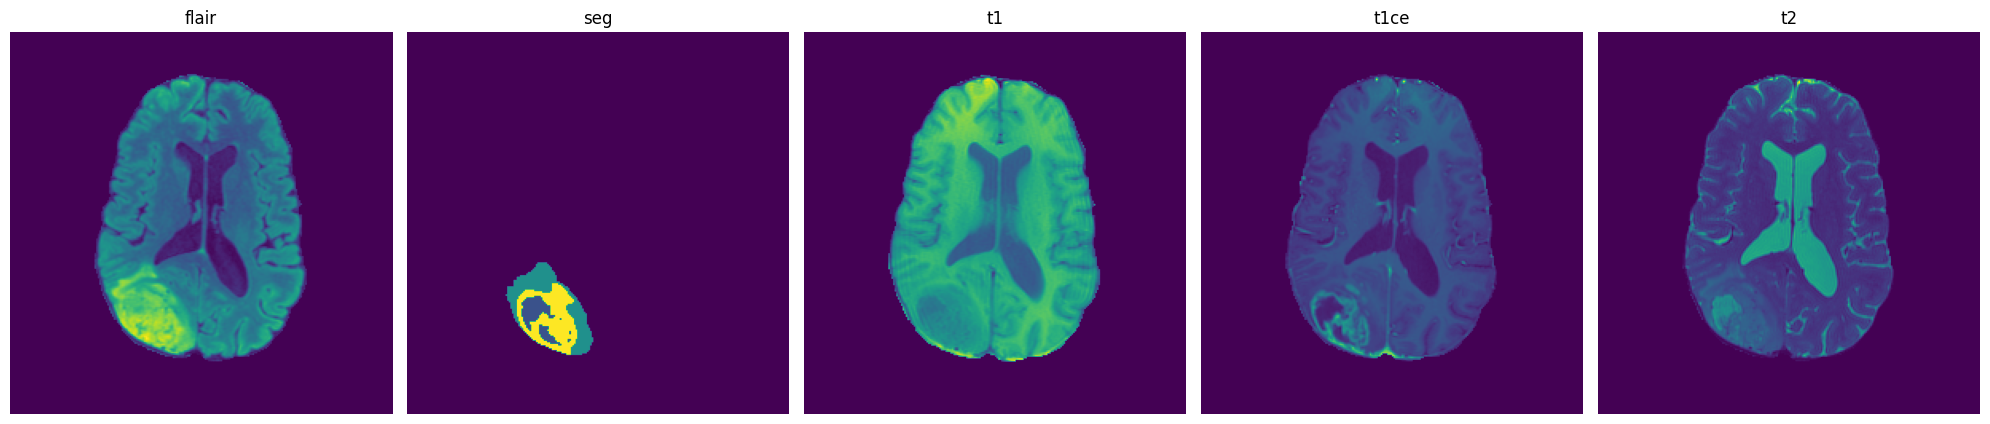

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)


# List of modalities and their corresponding file suffixes
modalities = ['flair', 'seg', 't1', 't1ce', 't2']

# Iterate over each modality to answer the questions
for i, modality in enumerate(modalities, 1):
    # Load the image using SimpleITK
    image_path = f"{case_00071_dir}/BraTS2021_00071_{modality}.nii.gz"
    image = sitk.ReadImage(image_path)
    img_arr = sitk.GetArrayFromImage(image)

    # Print the shape of the modality or segmentation label
    print(f"Shape of {modality}: {img_arr.shape}")

    # Calculating the minimum, maximum, and range of voxel values
    min_val = np.min(img_arr)
    max_val = np.max(img_arr)
    voxel_range = np.ptp(img_arr)  # Peak-to-peak range (max - min)
    print(f"Voxel values for {modality} - Min: {min_val}, Max: {max_val}, Range: {voxel_range}")

    # If the current modality is 'seg' (segmentation label), analyze its unique values
    if modality == 'seg':
        print(f"Segmentation label shape: {img_arr.shape}")
        unique_labels = np.unique(img_arr)
        print(f"Unique label values in segmentation: {unique_labels}")
        print("Label descriptions:")
        print("  0: Background (normal brain tissue)")
        print("  1: Necrotic and Non-Enhancing Tumor Core")
        print("  2: Peritumoral Edema")
        print("  4: Enhancing Tumor")

    print("-------------------------------------------")

    # Extract and display the 79th slice of the 3D volume
    slice_79 = np.squeeze(img_arr[79])

    # Add a subplot for each modality
    plt.subplot(1, 5, i)
    plt.imshow(slice_79)
    plt.title(modality)
    plt.axis('off')

# Show the plotted slices
plt.tight_layout()
plt.show()


The shape of each modality: **FLAIR, T1, T1CE, T2, are 155, 240, 240**
 representing the dimensions of the 3D MRI scan: 155 slices in depth, with each slice being 240x240 pixels. This shape indicates the spatial resolution and depth of the scan.

The segmentation label also has a shape of (155, 240, 240), matching the MRI modalities. This shape indicates that each voxel (3D pixel) in the label image aligns with a voxel in the MRI images. In other words, the segmentation label is designed to correspond spatially to the MRI images, allowing each voxel in the label to match the tissue or structure identified in the MRI at that specific location.



The **segmentation label** includes specific values representing different tissue types in the brain, defined as:

0: Background (normal brain tissue)

1: Necrotic and Non-Enhancing Tumor Core

2: Peritumoral Edema

4: Enhancing Tumor



---



## • Display the middle slices of the sagittal cut from the 3D MRI image.

Image shape: (240, 240, 155), Label shape: (240, 240, 155)
Unique labels in segmentation: [0. 1. 2. 4.]
1: Necrotic and Non-Enhancing Tumor Core
2: Peritumoral Edema
4: Enhancing Tumor


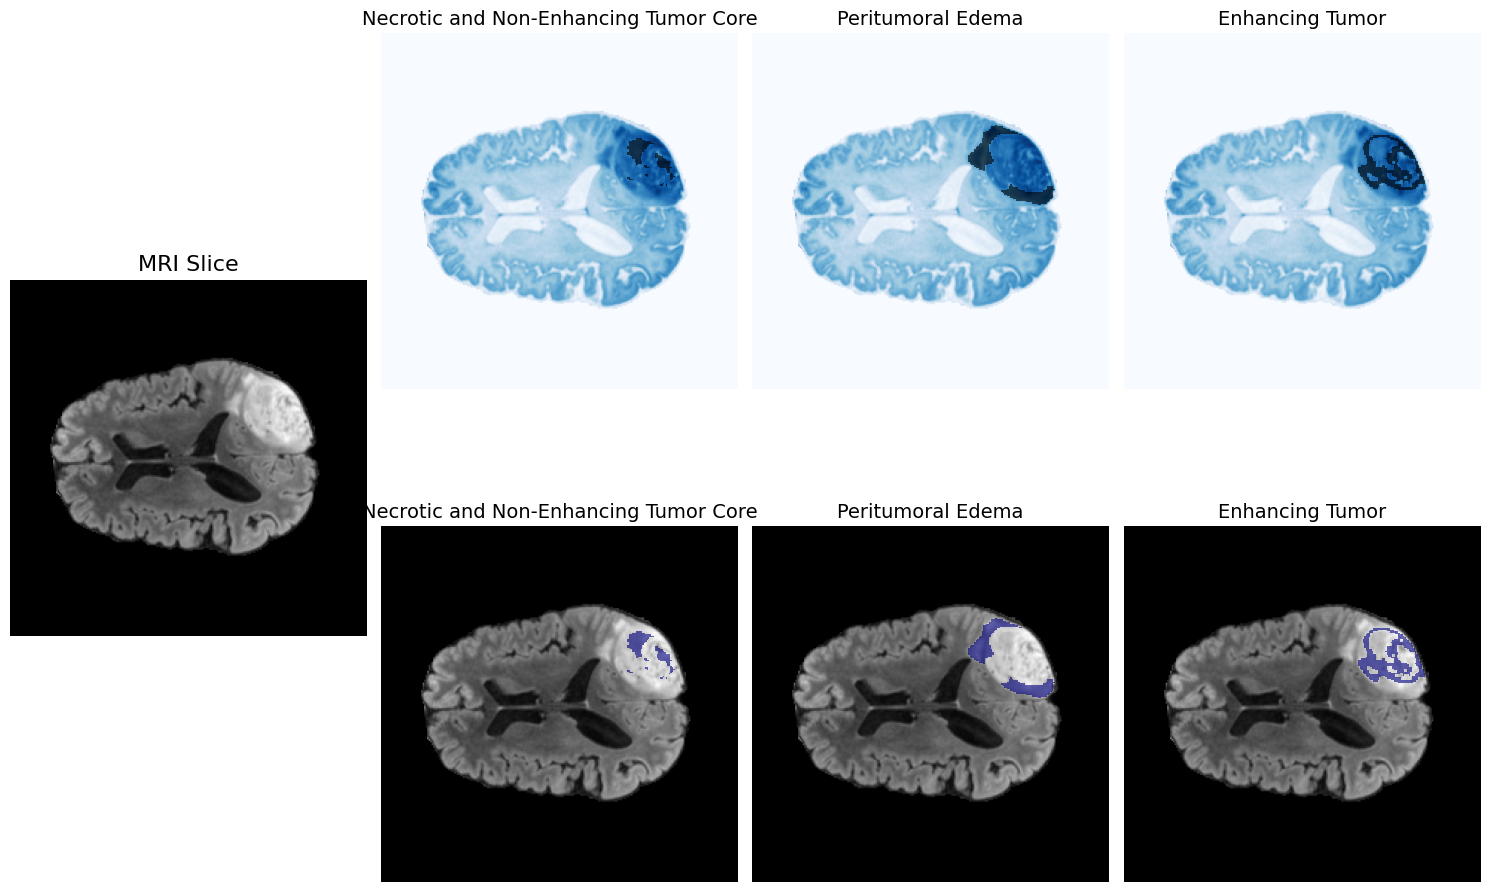

In [ ]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


data_dir = "/content/drive/MyDrive/BraTS_TrainDataset/BraTS2021_00071"
modality = "flair"

img_path = os.path.join(data_dir, f"BraTS2021_00071_{modality}.nii.gz")
label_path = os.path.join(data_dir, "BraTS2021_00071_seg.nii.gz")

# Load image and label data
img = nib.load(img_path).get_fdata()
label = nib.load(label_path).get_fdata()

print(f"Image shape: {img.shape}, Label shape: {label.shape}")

# Determining the middle slice index (sagittal)
slice_index = img.shape[2] // 2

# Extracting the corresponding slices
img_slice = img[:, :, slice_index]
label_slice = label[:, :, slice_index]

label_names = {
    0: "Background (normal brain tissue)",
    1: "Necrotic and Non-Enhancing Tumor Core",
    2: "Peritumoral Edema",
    4: "Enhancing Tumor"
}

unique_labels = np.unique(label_slice)
print(f"Unique labels in segmentation: {unique_labels}")

# Excluding background (0) from labels to plot
labels_to_plot = [label for label in [1, 2, 4] if label in unique_labels]

# Printing label descriptions
for label_value in labels_to_plot:
    print(f"{int(label_value)}: {label_names.get(label_value, 'Unknown')}")

# Creating a figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 4, figure=fig, width_ratios=[1, 1, 1, 1])

# MRI slice occupies the first column, covering both rows
ax_mri = fig.add_subplot(gs[:, 0])
ax_mri.set_title("MRI Slice", fontsize=16)
ax_mri.imshow(img_slice,  cmap='grey')
ax_mri.axis('off')

# Row 1: Displaying overlays using the first set
for idx, label_value in enumerate(labels_to_plot):
    label_mask = (label_slice == label_value)
    ax = fig.add_subplot(gs[0, idx + 1])
    ax.set_title(f"{label_names[int(label_value)]}", fontsize=14)
    ax.imshow(img_slice, cmap="Blues")
    ax.imshow(np.ma.masked_where(~label_mask, label_mask),
              cmap='grey', alpha=0.6)
    ax.axis("off")

# Row 2: Displaying overlays using the second set
for idx, label_value in enumerate(labels_to_plot):
    label_mask = (label_slice == label_value)
    ax = fig.add_subplot(gs[1, idx + 1])
    ax.set_title(f"{label_names[int(label_value)]}", fontsize=14)
    ax.imshow(img_slice, cmap="gray")
    ax.imshow(np.ma.masked_where(~label_mask, label_mask),
              cmap="jet", alpha=0.6)
    ax.axis("off")

# Adjusting layout
plt.tight_layout()
plt.show()




---



## 2. Based on the provided paper, what is the input shape of the UNETR model for the brain tumor segmentation problem? What does output shape? Please state the number of input channels and output channels. Also, the batch size is not necessary.



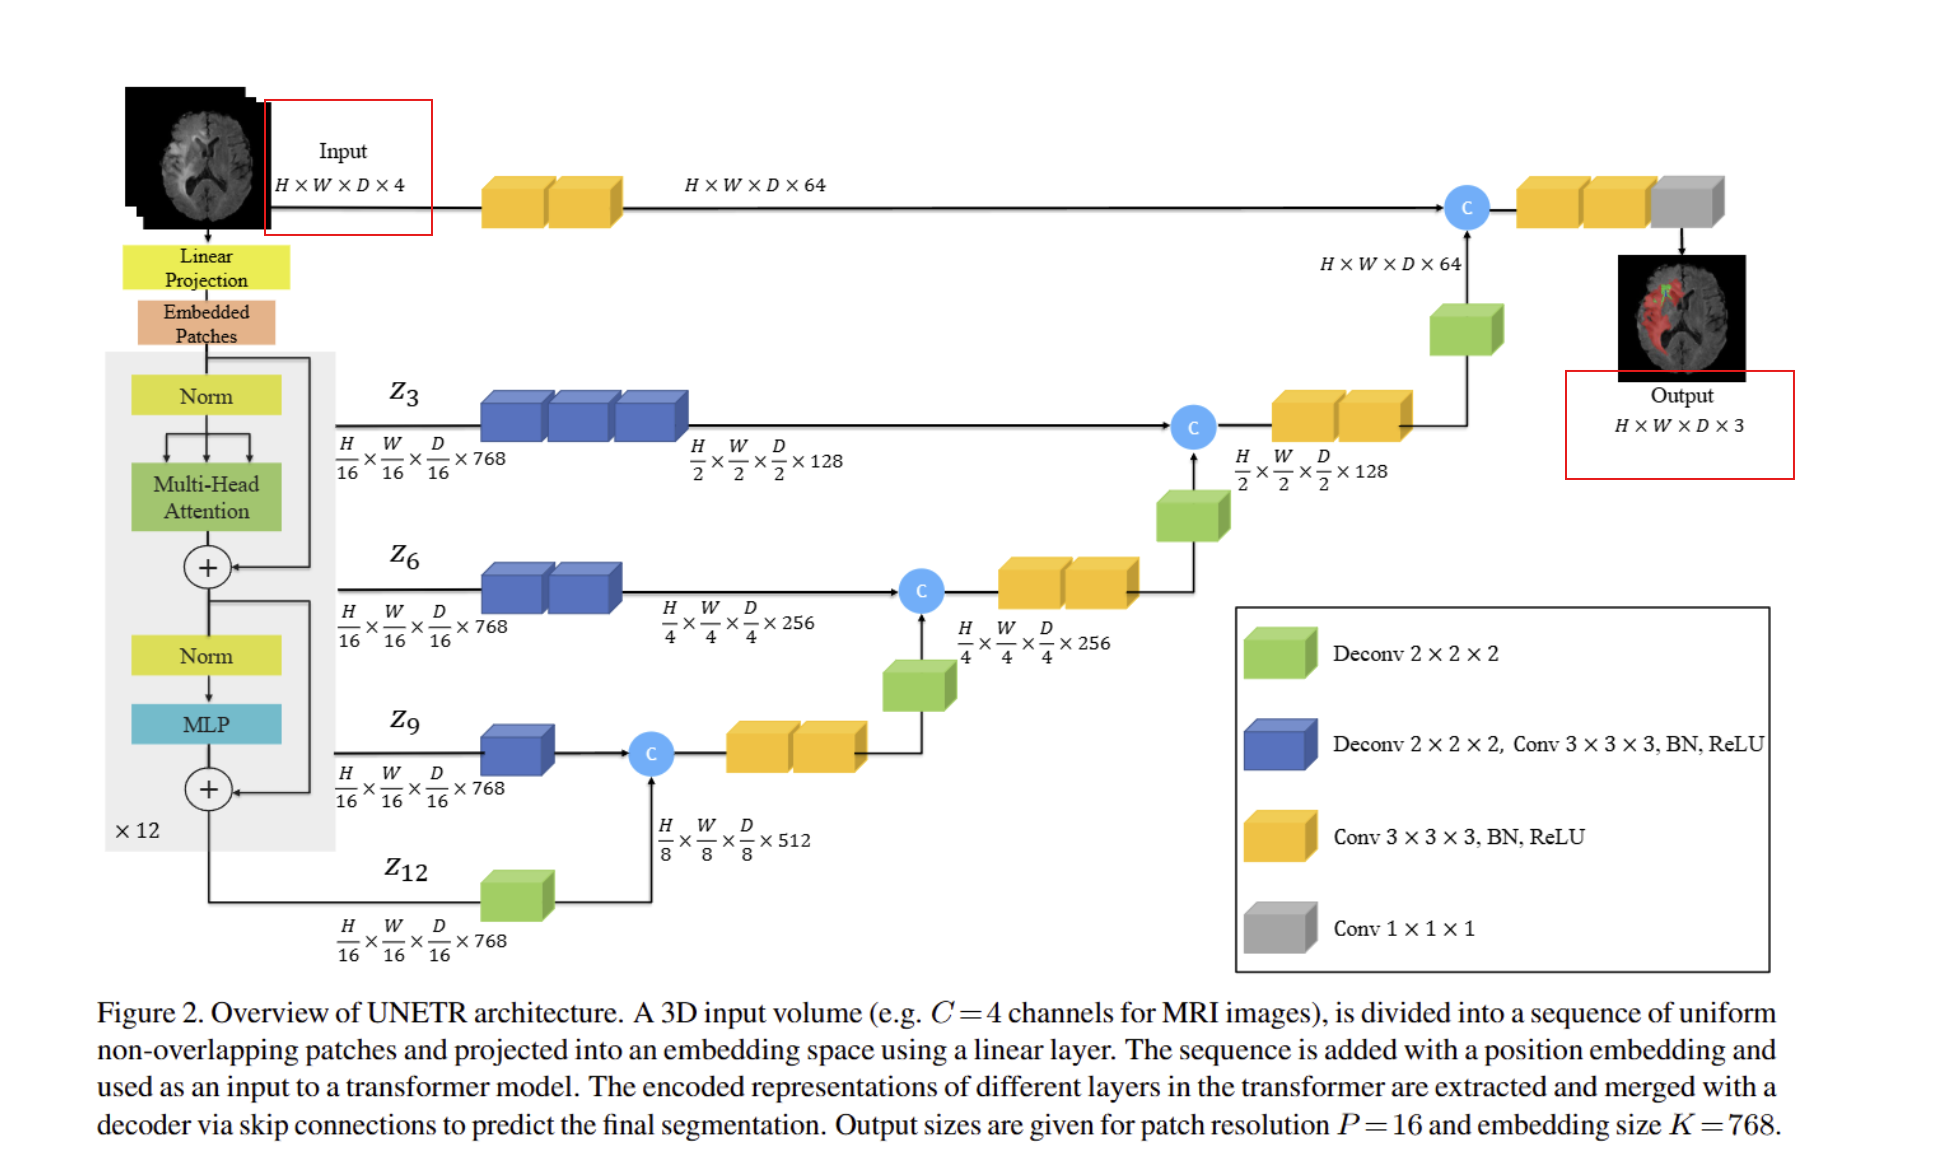

### Input Shape:
- The **input** shape is a **3D volume** with dimensions:
  (H,W,D) and C input channels

    - \( H \) = Height
    - \( W \) = Width
    - \( D \) = Depth (number of slices)
    - The last dimension, **4**, refers to the **four channels** for the four MRI modalities: FLAIR, T1, T1ce, and T2.

### Output Shape:
- The **output** shape is a segmented 3D volume with dimensions:
  (H,W,D) and C input channels
  - Here:
    - The last dimension, **3**, refers to the **three segmentation classes** predicted by the model:
    - Background (label 0)
    - Tumor Core (which may include both necrotic core and enhancing tumor, originally labeled as 1 and 4)
    - Edema (label 2)

### Note


> "...with ground truth labels of gliomas segmentation necrotic/active tumor and oedema is utilized...."



The architecture diagram shows that there are three labels while the original BraTS dataset uses labels [0, 1, 2, 4], so, in this case the UNETR model has been designed to combine some of these labels into 3 distinct classes for the output.





---



## 3- Do you think about why the input size of the model is different from the MRI image size?



> "For brain segmentation task, we randomly sample the input images with volume
sizes of [128, 128, 128]."


> "...dividing it into flattened uniform non-overlapping patches xv ∈ RN ×(P 3.C) where (P, P, P ) denotes the resolution of each patch and N = (H ×W ×D)/P 3 is the length of the sequence."

## Patch-Based Approach:

- The UNETR model divides the input 3D MRI volumes into non-overlapping patches before processing them through the transformer encoder. This requires resampling the original MRI data to fit a specific size that matches the model’s input requirements.

- This is why the model uses an input size of [128, 128, 128] instead of the full original resolution of the MRI images, which can vary significantly in size.

This helps by :
- Processing the entire MRI volume at its original resolution would require excessive computational resources and memory. By resampling to a fixed input size of [128, 128, 128], the model can efficiently learn patterns and segment the brain tumors while reducing computational load.

- This resizing standardizes the dimensions of the input, which ensures uniformity across all samples. This is crucial for models that process data in batches, as it simplifies the computational requirements and maintains consistency during training and inference.



---



## 4- Training the UNETR model on the BraTS2021 dataset.

## a. Create an appropriate metadata/json file for the dataset. You should split data into train, validation, and test sets.

In [ ]:
import os
import json
import random
from sklearn.model_selection import train_test_split

def gather_patient_files(dataset_dir):
    """
    Collects and organizes patient files from the dataset directory.

    Args:
        dataset_dir (str): Path to the dataset directory.

    Returns:
        dict: A dictionary where keys are patient IDs and values are lists of associated files.
    """
    patient_files = {}
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith('.nii.gz'):
                patient_id = file.rsplit("_", 1)[0]
                if patient_id in patient_files:
                    patient_files[patient_id].append(file)
                else:
                    patient_files[patient_id] = [file]
    return patient_files

def split_patient_ids(patient_ids, test_size=0.2, val_size=0.2, random_state=42):
    """
    Splits patient IDs into training, validation, and testing sets.

    Args:
        patient_ids (list): List of patient IDs.
        test_size (float): Proportion of the dataset to include in the test split.
        val_size (float): Proportion of the training set to include in the validation split.
        random_state (int): Random seed for reproducibility.

    Returns:
        tuple: Three lists containing training, validation, and testing patient IDs.
    """
    train_ids, test_ids = train_test_split(patient_ids, test_size=test_size, random_state=random_state)
    train_ids, val_ids = train_test_split(train_ids, test_size=val_size, random_state=random_state)

    return train_ids, val_ids, test_ids

def create_dataset_entries(patient_files, dataset_dir):
    """
    Creates dataset entries for each patient, including paths to images and labels.

    Args:
        patient_files (dict): Dictionary of patient files.
        dataset_dir (str): Path to the dataset directory.

    Returns:
        list: List of dictionaries with image and label paths for each patient.
    """
    entries = []
    for patient_id, files in patient_files.items():
        modalities = ['flair', 't1', 't1ce', 't2']
        images = []
        for modality in modalities:
            file = next((f for f in files if f.endswith(f'{modality}.nii.gz')), None)
            if file:
                images.append(os.path.join(dataset_dir, patient_id, file))
            else:
                break
        label = next((f for f in files if f.endswith('seg.nii.gz')), None)
        if len(images) == len(modalities) and label:
            entries.append({
                "image": images,
                "label": os.path.join(dataset_dir, patient_id, label)
            })
    return entries

def create_monai_json(dataset_dir, output_file):
    """
    Generates a JSON file compatible with MONAI, organizing the dataset into training,
    validation, and testing sets.

    Args:
        dataset_dir (str): Path to the dataset directory.
        output_file (str): Path to save the generated JSON file.
    """
    patient_files = gather_patient_files(dataset_dir)
    patient_ids = list(patient_files.keys())
    print(f'The length of patient IDs: {len(patient_ids)}')
    train_ids, val_ids, test_ids = split_patient_ids(patient_ids)

    dataset_dict = {
        "training": create_dataset_entries({pid: patient_files[pid] for pid in train_ids}, dataset_dir),
        "validation": create_dataset_entries({pid: patient_files[pid] for pid in val_ids}, dataset_dir),
        "testing": create_dataset_entries({pid: patient_files[pid] for pid in test_ids}, dataset_dir)
    }

    with open(output_file, 'w') as json_file:
        json.dump(dataset_dict, json_file, indent=4)
    print(f"JSON file '{output_file}' created successfully.")

# Usage
dataset_directory = '/content/drive/MyDrive/BraTS_TrainDataset'
output_json_path = '/content/dataset_metadata.json'
create_monai_json(dataset_directory, output_json_path)

The length of patient IDs: 750
JSON file '/content/dataset_metadata.json' created successfully.


In [ ]:
import json

# Load the JSON data from the file
with open(output_json_path, 'r') as f:
    data = json.load(f)

# Now you can access the 'training' key
print(len(data['training']))

print(len(data['validation']))

print(len(data['testing']))

475
118
147


## Create Model, Loss, Optimizer

## Set up environment

In [ ]:
!pip install keras tensorboardX torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install -q "monai-weekly[nibabel, tqdm, einops]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 70.4 MB/s eta 0:00:00


In [ ]:
import os
import shutil
import tempfile

from tqdm import tqdm
import nibabel as nib
from monai import data
from monai.losses import DiceCELoss
from monai import transforms
from monai.inferers import sliding_window_inference
from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
)

from monai.config import print_config
from monai.metrics import DiceMetric
from monai.networks.nets import UNETR

from monai.data import (
    DataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)

import torch

print_config()

MONAI version: 1.5.dev2446
Numpy version: 1.23.5
Pytorch version: 2.5.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 218216250ce297265400abe56ee915898d75a2ec
MONAI __file__: /usr/local/lib/python3.10/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.3.2
scikit-image version: 0.24.0
scipy version: 1.13.1
Pillow version: 11.0.0
Tensorboard version: 2.17.1
gdown version: 5.2.0
TorchVision version: 0.20.1+cu121
tqdm version: 4.66.6
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.5
pandas version: 2.2.2
einops version: 0.8.0
transformers version: 4.46.2
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.i

In [ ]:
!git clone https://github.com/Project-MONAI/research-contributions.git


Cloning into 'research-contributions'...
remote: Enumerating objects: 2891, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 2891 (delta 173), reused 251 (delta 114), pack-reused 2536 (from 1)
Receiving objects: 100% (2891/2891), 26.34 MiB | 26.09 MiB/s, done.
Resolving deltas: 100% (1630/1630), done.


In [ ]:
%cd research-contributions/UNETR/BTCV

/content/research-contributions/UNETR/BTCV


Changing some runtime arguments

In [ ]:
!python main.py

2024-11-21 22:53:33.073727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-21 22:53:33.092851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-21 22:53:33.098879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-21 22:53:34.221831: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` was changed in vers